## Plan:

In [17]:
require(svMisc)

In [23]:
for (i in 0:150) {
    k = as.integer(i/150*100)+1
    progress(k, progress.bar = TRUE)
#     Sys.sleep(0.01)
#     if (i == 101) cat("Done!\n")
}

          0%---------25%---------50%---------75%--------100%
Progress: ||||||||||||||||||||||||||||||||||||||||||||||||||


In [ ]:
library(xtable)
print(xtable(df_acc_test[order(df_acc_test$RMSE),]))

mat <- round(matrix(c(0.9, 0.89, 200, 0.045, 2.0), c(1, 5)), 4)
rownames(mat) <- "$y_{t-1}$"colnames(mat) <- c("$R^2$", "$\\bar{x}$", "F-stat", "S.E.E", "DW")mat <- xtable(mat)print(mat, sanitize.text.function = function(x){x})

align(tli.table) <- "|rrl|l|lr|"tli.table
display(tli.table)[c(2,6)] <- "f"digits(tli.table) <- 3tli.table
print(xtable(anova(fm3)), hline.after = c(1))

In [ ]:
# Save a single object to a file
saveRDS(mtcars, "mtcars.rds")
# Restore it under a different name
my_data <- readRDS("mtcars.rds")

1. ~~описать метрики, MASE?~~
    - ME
    - RMSE
    - MAPE
8. ~~описать CV~~
    - EU: 48 (6)
    - US: 28 (6)
    - RUS: 84 (5)
2. описать dm тест, use and abuse
6. ~~построить картинки с DM тестом~~
6. ~~[построить картинки с CV](https://robjhyndman.com/hyndsight/tscvexample/)~~
7. пересчитать ARIMAX
    - ~~выбрать лучший лаг~~my 
        - EU: Arima(order=c(3,0,0), seasonal=c(2,0,0), include.drift = TRUE, include.constant = TRUE)
        - US: Arima(order=c(4,0,0), include.drift = TRUE, trend = poly, h=h)}
        - RUS: Arima(order=c(11,0,0), seasonal=c(2,0,0), trend = poly, include.constant = TRUE)
    - ~~полиномиальный тренд для РФ~~
    - дамми для тренда 
    - transform function
    - closest neighbor to MA?
8. выбрать модель для кластеризации
9. выбрать метрики кластеризации
10. diff or trend reduction before clustering
11. seasonality reduction before clustering
9. описать все модели
    - ~~AR(3)~~
    - AR(3) + str
    - AR(3) + xreg
        - описать метрики для поиска ближайшего соседа
        - xreg closest neighbor
        - xreg cluster sum
        - https://stackoverflow.com/questions/25224155/transfer-function-models-arimax-in-tsa
        - https://robjhyndman.com/hyndsight/arimax/
10. описать все методы
    - ~~прогноз агрегата~~
        - ~~top~~    
    - прогноз и суммирование
        - 2nd (state)
        - 2nd (type)
        - 2nd (clust)
            - считать сумму ошибок для 2 уровня из 3 уровневой 
        - 3rd 
    - прогноз и взвешенное суммирование
    - HB
3. clusterization based on error correlation metric
4. Duncan (analogous TS)  в текст
5. офоромить "Сносочка"
6. оформить таблички
1. графики в ggplot2


### CV
- arima не считает большие числа
- внутри tscv - ts()

- для РФ theta method дает странные результаты, из-за близости к нулю?

### Top level

####    AR(3) 

In [7]:
df_ac_1

RMSE,MAPE,ACF1,Theil's U
30.00450,0.8423452,0.3147106,0.4774273
70.35219,1.6318005,0.6839184,1.2522039
63.19442,1.7068541,0.2837959,0.9335619
71.40787,1.9332753,0.3711943,1.1356505
55.14303,1.5573230,0.4297768,0.9073770


In [8]:
colMeans(df_ac_1)

RMSE       MAPE       ACF1  Theil's U 
58.0204039  1.5343196  0.4166792  0.9412441

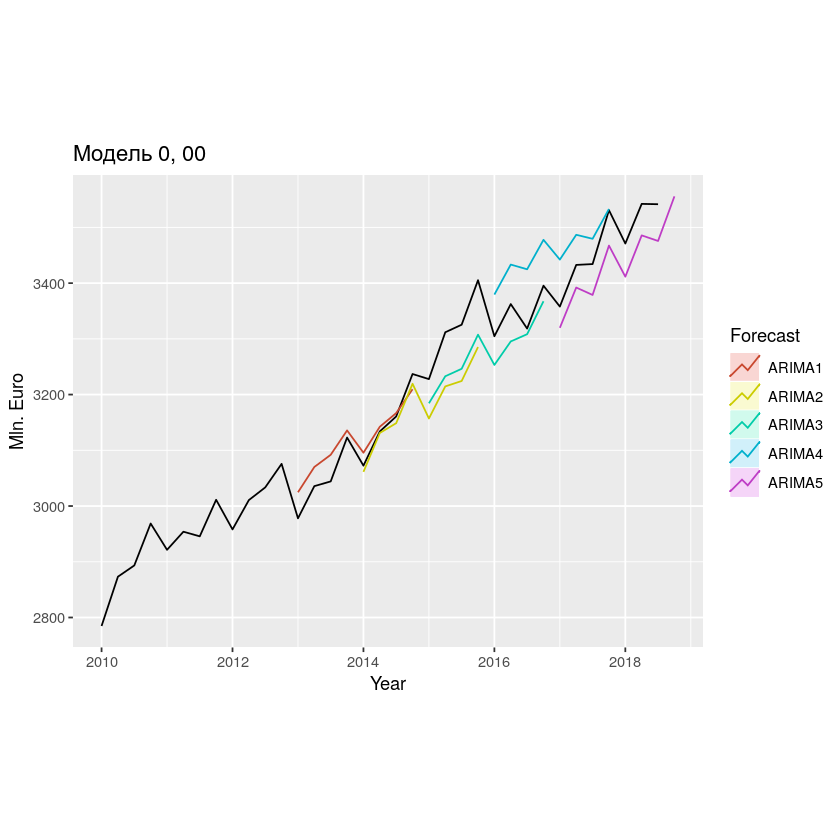

In [9]:
autoplot(window(gdp_agg, start=2010))+
    autolayer(l[[1]], series="ARIMA1", PI=FALSE) +
    autolayer(l[[2]], series="ARIMA2", PI=FALSE) +
    autolayer(l[[3]], series="ARIMA3", PI=FALSE) +
    autolayer(l[[4]], series="ARIMA4", PI=FALSE) +
    autolayer(l[[5]], series="ARIMA5", PI=FALSE) +
    xlab("Year") + ylab("Mln. Euro") +
    ggtitle("Модель 0, 00") +
    guides(colour=guide_legend(title="Forecast")) +
    theme(aspect.ratio = 0.75)

#### AR(3) + structural break 

- структурный сдвиг одинаковый для всех выборок и начинается на 2008 (по модели):

``train  ~  1 + time(train)``



In [106]:
df_ac_1s

RMSE,MAPE,ACF1,Theil's U
41.43026,1.220307,0.1147186,0.6791211
61.09521,1.376503,0.6855353,1.0880309
56.10122,1.456742,0.4673110,0.8172604
69.57626,1.926973,0.2951082,1.1195179
41.58108,1.182393,0.3127301,0.6762258


In [107]:
colMeans(df_ac_1s)

RMSE       MAPE       ACF1  Theil's U 
53.9568052  1.4325835  0.3750806  0.8760312

### Third level 

#### AR(3) 

- ML-CSS не считает много где
- ML оценки лучше CSS оценок (15 ряд на 2 выборке не считается, поэтому считаем, все, что не считается с помощью CSS)

- Если ошибка нормально распределена, то минимизация MSE
эквивалентна методу максимального правдоподобия
- На самом деле $\hat{\beta}^{OLS}$, полученная по МНК совпадает с оценкой
максимального правдоподобия, при условии, что $𝜀 ∼ 𝑁(0, 𝜎^2)$


__ met  <-  "CSS"__

In [113]:
df_ac 

ME,RMSE,MAE,MAPE,MPE
29.19700,53.44973,44.17503,1.406911,0.9084537
68.73230,87.43198,68.73230,2.078017,2.0780171
67.39017,71.83022,67.39017,2.018860,2.0188603
-70.66928,76.20563,70.66928,2.098900,-2.0989004
62.77367,64.49063,62.77367,1.801197,1.8011968


__ met  <-  "ML"__

In [65]:
df_ac

ME,RMSE,MAE,MAPE,MPE
-17.87512,29.72522,25.16467,0.8207038,-0.5955032
55.09397,71.33892,55.09397,1.6645230,1.6645230
57.56785,63.64543,57.56785,1.7249067,1.7249067
-63.67907,70.28057,63.67907,1.8938485,-1.8938485
55.47911,56.44166,55.47911,1.5931747,1.5931747


In [66]:
colMeans(df_ac)

ME       RMSE        MAE       MAPE        MPE 
17.3173480 58.2863592 51.3969354  1.5394313  0.4986505

#### AR(3) + structural break (2008)

In [147]:
df_ac_s

ME,RMSE,MAE,MAPE,MPE
-35.58530,40.18503,36.33378,1.186612,-1.163489
46.79878,62.21546,46.79878,1.412525,1.412525
46.99553,56.54978,48.95910,1.469497,1.410326
-64.21756,68.95491,64.21756,1.906320,-1.906320
42.14006,42.59684,42.14006,1.211301,1.211301


In [149]:
colMeans(df_ac_s)

ME       RMSE        MAE       MAPE        MPE 
 7.2263016 54.1004052 47.6898590  1.4372512  0.1928688

#### AR(3) + structural break 

In [214]:
df_ac_sa

ME,RMSE,MAE,MAPE,MPE
-35.56694,40.18198,36.34471,1.186941,-1.162913
46.85718,62.25154,46.85718,1.414317,1.414317
47.03895,56.55225,48.96649,1.469709,1.411624
-64.05012,68.81104,64.05012,1.901414,-1.901414
42.29784,42.76788,42.29784,1.215777,1.215777


In [215]:
colMeans(df_ac_sa)

ME       RMSE        MAE       MAPE        MPE 
 7.3153846 54.1129379 47.7032685  1.4376316  0.1954782

#### AR(3)LI with neighbors (different metrics)

- choosing number of lags for xreg (DTW)

_1 LAG_

In [305]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,AT,BE,BG,CY,CZ,DE,DK,EE,EL,⋯,UKA,UKB,UKF,UKG,UKJ,UKK,UKL,UKM,UKO,UKR
ME,55.492717,0.1292254,-0.4285559,-0.7819245,-1.149823,1.404161,21.109878,-0.6603237,-1.003559,0.1523466,⋯,0.3777341,6.788382,3.411565,6.000715,1.037404,-2.680209,5.195082,5.550773,-2.624961,3.642126
RMSE,56.454316,0.6085641,0.5771218,0.8913891,1.237717,1.700282,22.894624,1.1072745,1.087434,0.5662423,⋯,0.4521147,7.098195,3.429439,6.072424,1.353770,3.152632,5.322240,5.696657,4.923690,3.688942
MAE,55.492717,0.4969950,0.5214705,0.7819245,1.149823,1.524718,21.109878,0.9440658,1.003559,0.4420568,⋯,0.3904389,6.788382,3.411565,6.000715,1.116356,2.680209,5.195082,5.550773,4.161104,3.642126
MAPE,1.593569,0.5871874,0.5264923,6.9040015,26.404419,3.363274,2.796842,1.4835034,18.874966,1.0957592,⋯,11.2925603,9.138839,10.647020,6.427484,3.225036,7.358034,7.333207,8.374036,4.512622,16.348190
MPE,1.593569,0.1442306,-0.4296426,-6.9040015,-26.404419,3.056411,2.796842,-1.0342503,-18.874966,0.3569877,⋯,10.8930065,9.138839,10.647020,6.427484,2.981859,-7.358034,7.333207,8.374036,-2.867141,16.348190


(diff cor)

In [55]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,AT,BE,BG,CY,CZ,DE,DK,EE,EL,⋯,UKA,UKB,UKF,UKG,UKJ,UKK,UKL,UKM,UKO,UKR
ME,55.452122,0.1592184,-0.3899763,-0.7387659,-1.114259,1.459264,20.77050,-0.5963999,-0.9606873,0.2070718,⋯,1.036903,5.701680,3.235307,4.509644,1.760525,-1.584016,6.318369,4.558520,-1.980247,2.537810
RMSE,56.413296,0.6178734,0.5455135,0.8503348,1.202747,1.750854,22.57129,1.0574991,1.0457180,0.5805056,⋯,1.075660,5.996266,3.258633,4.589179,1.996958,2.178933,6.439407,4.688704,4.420348,2.613599
MAE,55.452122,0.4960431,0.4894781,0.7387659,1.114259,1.569865,20.77050,0.8905905,0.9606873,0.4234277,⋯,1.036903,5.701680,3.235307,4.509644,1.760525,1.803412,6.318369,4.558520,3.703187,2.537810
MAPE,1.592402,0.5854210,0.4942691,6.5253570,25.583233,3.461531,2.75155,1.3996123,18.0613584,1.0456769,⋯,30.349318,7.668023,10.098321,4.822494,5.104646,4.962060,8.921811,6.874455,4.013333,11.376345
MPE,1.592402,0.1800530,-0.3905533,-6.5253570,-25.583233,3.180009,2.75155,-0.9338171,-18.0613584,0.4941022,⋯,30.349318,7.668023,10.098321,4.822494,5.104646,-4.390577,8.921811,6.874455,-2.166458,11.376345


(diff cor, diif reg)


_4 LAG_

In [373]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,AT,BE,BG,CY,CZ,DE,DK,EE,EL,⋯,UKA,UKB,UKF,UKG,UKJ,UKK,UKL,UKM,UKO,UKR
ME,55.506310,0.1177021,-0.4353434,-0.7886771,-1.163865,1.419461,20.951345,-0.6742184,-1.011770,0.1531482,⋯,0.4031278,6.288661,2.939164,3.972186,1.330313,-2.502581,5.050548,4.892108,3.073373,1.164058
RMSE,56.469628,0.6025545,0.5848640,0.8999838,1.253684,1.703976,22.761306,1.1202066,1.097518,0.5658541,⋯,0.4609498,6.505448,2.964669,4.068284,1.539734,3.060059,5.192467,5.076497,3.777148,1.604283
MAE,55.506310,0.4948513,0.5298301,0.7886771,1.163865,1.525202,20.951345,0.9580211,1.011770,0.4423477,⋯,0.4031278,6.288661,2.939164,3.972186,1.330313,2.591409,5.050548,4.892108,3.516333,1.379944
MAPE,1.593954,0.5847508,0.5349791,6.9562168,26.720622,3.362582,2.775563,1.5054099,19.021543,1.0966785,⋯,11.6328552,8.477114,9.169885,4.248025,3.849245,7.116065,7.127194,7.377567,3.806340,6.166231
MPE,1.593954,0.1307288,-0.4364909,-6.9562168,-26.720622,3.093432,2.775563,-1.0560612,-19.021543,0.3594374,⋯,11.6328552,8.477114,9.169885,4.248025,3.849245,-6.881352,7.127194,7.377567,3.325854,5.184372


(diff cor)

In [62]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,AT,BE,BG,CY,CZ,DE,DK,EE,EL,⋯,UKA,UKB,UKF,UKG,UKJ,UKK,UKL,UKM,UKO,UKR
ME,55.50263,0.1226815,-0.4428594,-0.7869648,-1.160944,1.444328,20.956078,-0.6338909,-1.006720,0.1543985,⋯,0.1677260,4.712493,3.930230,5.310681,1.114920,-3.301635,5.331325,4.590595,2.875828,2.080017
RMSE,56.46549,0.6037936,0.5869318,0.8957090,1.249528,1.729284,22.742951,1.0934798,1.091032,0.5629566,⋯,0.3720835,5.119455,3.971379,5.618238,1.324861,3.961992,5.452578,4.757246,3.693626,2.255131
MAE,55.50263,0.4958433,0.5320367,0.7869648,1.160944,1.545661,20.956078,0.9305798,1.006720,0.4368103,⋯,0.3180207,4.712493,3.930230,5.310681,1.114920,3.301635,5.331325,4.590595,3.444472,2.080017
MAPE,1.59385,0.5858771,0.5371368,6.9444308,26.655662,3.406671,2.776358,1.4624549,18.929856,1.0830851,⋯,9.2886649,6.322657,12.270157,5.664960,3.222625,9.059123,7.525655,6.951024,3.728048,9.306082
MPE,1.59385,0.1367881,-0.4441827,-6.9444308,-26.655662,3.148742,2.776358,-0.9927031,-18.929856,0.3631361,⋯,4.6103518,6.322657,12.270157,5.664960,3.222625,-9.059123,7.525655,6.951024,3.111230,9.306082


(diff cor, diif reg)


_1,4 LAGS_

In [361]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,AT,BE,BG,CY,CZ,DE,DK,EE,EL,⋯,UKA,UKB,UKF,UKG,UKJ,UKK,UKL,UKM,UKO,UKR
ME,55.508834,0.1113976,-0.4543242,-0.7925572,-1.164636,1.399850,20.976292,-0.6864538,-1.018363,0.1481836,⋯,0.1258074,6.499921,3.28600,5.623742,0.4179086,-2.782137,4.242035,7.085545,-0.1626509,2.551588
RMSE,56.470494,0.6022875,0.6006985,0.9041794,1.252933,1.692016,22.760334,1.1271332,1.102601,0.5682218,⋯,0.3268074,6.688368,3.32328,5.711087,0.8728033,3.292932,4.389079,7.327279,3.4337512,2.659263
MAE,55.508834,0.4946248,0.5424412,0.7925572,1.164636,1.515554,20.976292,0.9638829,1.018363,0.4462784,⋯,0.2842414,6.499921,3.28600,5.623742,0.7269500,2.789581,4.242035,7.085545,2.4939225,2.551588
MAPE,1.594031,0.5847474,0.5475407,6.9969219,26.746296,3.342621,2.779071,1.5145792,19.154888,1.1061539,⋯,8.2992517,8.767680,10.25490,6.023740,2.1238423,7.650653,5.985910,10.675356,2.6975555,11.433386
MPE,1.594031,0.1230153,-0.4556918,-6.9969219,-26.746296,3.048113,2.779071,-1.0753218,-19.154888,0.3462913,⋯,3.5993251,8.767680,10.25490,6.023740,1.1736513,-7.630985,5.985910,10.675356,-0.1974377,11.433386


(diff cor)

In [69]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,AT,BE,BG,CY,CZ,DE,DK,EE,EL,⋯,UKA,UKB,UKF,UKG,UKJ,UKK,UKL,UKM,UKO,UKR
ME,55.480025,0.1367887,-0.4314460,-0.7662182,-1.140116,1.461463,20.762486,-0.5985986,-0.9860676,0.2088020,⋯,0.5438986,5.285674,4.044151,4.661334,1.439298,-2.425690,5.650834,4.590257,0.2172928,2.529574
RMSE,56.441261,0.6066465,0.5760165,0.8754133,1.227556,1.750158,22.539508,1.0606955,1.0696977,0.5835706,⋯,0.6036673,5.702987,4.095668,4.948349,1.659092,3.129005,5.768247,4.752993,3.4402826,2.666413
MAE,55.480025,0.4938722,0.5198512,0.7662182,1.140116,1.564927,20.762486,0.8954374,0.9860676,0.4260066,⋯,0.5438986,5.285674,4.044151,4.661334,1.439298,2.645773,5.650834,4.590257,2.5152208,2.529574
MAPE,1.593204,0.5832068,0.5248052,6.7660497,26.180066,3.449419,2.750656,1.4073195,18.5434580,1.0522360,⋯,15.8039826,7.101125,12.628022,4.970845,4.171337,7.255110,7.979003,6.948751,2.7179511,11.331652
MPE,1.593204,0.1536315,-0.4326561,-6.7660497,-26.180066,3.186064,2.750656,-0.9373304,-18.5434580,0.4987541,⋯,15.8039826,7.101125,12.628022,4.970845,4.171337,-6.681838,7.979003,6.948751,0.2146566,11.331652


(diff cor, diif reg)


_1:4 LAGS_

In [381]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,AT,BE,BG,CY,CZ,DE,DK,EE,EL,⋯,UKA,UKB,UKF,UKG,UKJ,UKK,UKL,UKM,UKO,UKR
ME,55.472654,0.1590869,-0.4463927,-0.7546724,-1.130585,1.454819,20.400512,-0.6515986,-0.9824002,0.1541156,⋯,0.3026757,5.656414,2.705064,6.746476,0.5743495,-2.784027,2.767468,8.934307,-1.121767,2.944837
RMSE,56.430502,0.6373041,0.5913949,0.8654012,1.214329,1.763576,22.112192,1.0998026,1.0634346,0.5645267,⋯,0.4080714,5.772976,2.723010,6.865435,1.2367201,3.388902,3.148715,9.266287,3.542818,2.997808
MAE,55.472654,0.5131923,0.5348841,0.7546724,1.130585,1.575185,20.400512,0.9356173,0.9824002,0.4388484,⋯,0.3167817,5.656414,2.705064,6.746476,1.0259028,2.928917,2.826543,8.934307,2.742014,2.944837
MAPE,1.593002,0.6059755,0.5399716,6.6723823,25.973266,3.472807,2.702978,1.4702602,18.4881283,1.0867453,⋯,9.4741953,7.646434,8.445192,7.220422,2.9972487,8.031081,3.983863,13.457751,2.972307,13.216131
MPE,1.593002,0.1792193,-0.4477326,-6.6723823,-25.973266,3.166431,2.702978,-1.0205693,-18.4881283,0.3614910,⋯,9.0656990,7.646434,8.445192,7.220422,1.6065703,-7.648234,3.899533,13.457751,-1.237750,13.216131


(diff cor)


In [76]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,AT,BE,BG,CY,CZ,DE,DK,EE,EL,⋯,UKA,UKB,UKF,UKG,UKJ,UKK,UKL,UKM,UKO,UKR
ME,55.486926,0.1629704,-0.4672786,-0.7722165,-1.147987,1.622229,21.149336,-0.6135952,-0.9984207,0.2350245,⋯,1.143715,5.752653,4.748631,5.736857,1.134802,-3.230846,3.498996,4.697373,-0.2578611,2.623299
RMSE,56.446558,0.6215258,0.6076255,0.8779022,1.232664,1.928064,23.024366,1.0715171,1.0792669,0.5843540,⋯,1.269123,5.966251,4.776332,6.215630,1.477569,3.854466,3.807367,4.862582,3.1386876,2.790034
MAE,55.486926,0.5011165,0.5449281,0.7722165,1.147987,1.718951,21.149336,0.9072071,0.9984207,0.4192807,⋯,1.143715,5.752653,4.748631,5.736857,1.287530,3.230846,3.498996,4.697373,2.1415701,2.623299
MAPE,1.593408,0.5916393,0.5499431,6.8230512,26.365718,3.785094,2.801443,1.4256861,18.7827597,1.0332117,⋯,33.794522,7.750443,14.812565,6.114547,3.731114,8.866569,4.931939,7.106643,2.3167860,11.752325
MPE,1.593408,0.1841969,-0.4690050,-6.8230512,-26.365718,3.538901,2.801443,-0.9608061,-18.7827597,0.5647250,⋯,33.794522,7.750443,14.812565,6.114547,3.268611,-8.866569,4.931939,7.106643,-0.2981329,11.752325


#### DTW 1 LAG 

- Not enough data to fit the model  (NA for first 40)

_different neighbors_

In [133]:
df_ac_sa

ME,RMSE,MAE,MAPE,MPE
58.38298,73.93487,58.38298,1.766278,1.766278
60.95709,66.71306,60.95709,1.826661,1.826661
-60.13053,67.09319,60.89235,1.810786,-1.789210
58.08108,59.00497,58.08108,1.668116,1.668116


In [134]:
colMeans(df_ac_sa)

ME       RMSE        MAE       MAPE        MPE 
29.3226542 66.6865220 59.5783754  1.7679602  0.8679613

(diff cor)


In [90]:
df_ac_sa

ME,RMSE,MAE,MAPE,MPE
57.70211,73.39385,57.70211,1.745212,1.745212
60.37804,66.18653,60.37804,1.809276,1.809276
-60.63590,67.54309,61.26991,1.822065,-1.804109
58.18227,59.10490,58.18227,1.671030,1.671030


In [91]:
colMeans(df_ac_sa)

ME       RMSE        MAE       MAPE        MPE 
28.9066306 66.5570942 59.3830832  1.7618957  0.8553522

(diff cor, diif reg)


_same neighbors_

In [140]:
df_ac_sa

ME,RMSE,MAE,MAPE,MPE
44.22245,63.20955,46.06633,1.387081,1.328244
57.58658,63.66138,57.58658,1.725470,1.725470
-63.97691,70.54877,63.97691,1.902630,-1.902630
55.50024,56.46211,55.50024,1.593783,1.593783


In [141]:
colMeans(df_ac_sa)

ME       RMSE        MAE       MAPE        MPE 
23.3330888 63.4704544 55.7825162  1.6522410  0.6862168

(diff cor)

In [95]:
df_ac_sa

ME,RMSE,MAE,MAPE,MPE
55.06192,71.29769,55.06192,1.663559,1.663559
57.54528,63.61898,57.54528,1.724232,1.724232
-63.63923,70.24252,63.63923,1.892674,-1.892674
55.46205,56.42360,55.46205,1.592687,1.592687


In [96]:
colMeans(df_ac_sa)

ME       RMSE        MAE       MAPE        MPE 
26.1075045 65.3956946 57.9271190  1.7182879  0.7719509

(diff cor, diif reg)


####   Weighted sum (?clustering based on error correlation metric)

####    HB

2. Second level
    - AR(3) 
    - AR(3) + structural break 
    - AR(3)LI with neighbors
    - weighted sum
    - HB 
3. Second level (grouped sum from 3 level) (?clustering based on error correlation metric)
    - AR(3) 
    - AR(3) + structural break 
    - weighted sum
    - HB
6. Repeat for US and RUS 
7. DM test

In [2]:
(75+1)/4

19.0

In [13]:
list(range(52, 77, 4))

[52, 56, 60, 64, 68, 72, 76]

In [14]:
len(list(range(52, 77, 4))) - 1

6

Hypotheses:

- various time series react differently on various covariates
    - look for new regressors (adding closest (by different   metrics) neighbor helps)
    - [add stuctural change dummy](https://datascienceplus.com/dummy-variable-for-examining-structural-instability-in-regression-an-alternative-to-chow-test/), [Testing for unit roots and
structural breaks](https://www.resakss-asia.org/files/2017/02/Day8_Session4_Structural-Breaks.pdf), [модели  марковскими переключениями](http://quantile.ru/11/11-Literacy.pdf) 
- compare optimal weights combination, [BU, TD](https://otexts.com/fpp2/top-down.html) and HB
    - dummy for structural change to prior for $\theta's$    
    - [ForecastCombinations](https://cran.r-project.org/web/packages/ForecastCombinations/ForecastCombinations.pdf), [ForecastComb](https://cran.r-project.org/web/packages/ForecastComb/ForecastComb.pdf), [Forecast Combinations in R](https://journal.r-project.org/archive/2018/RJ-2018-052/RJ-2018-052.pdf), [R packages for forecast combinations](https://robjhyndman.com/hyndsight/forecast-combinations/), [optimal combination](http://webdoc.sub.gwdg.de/ebook/serien/e/monash_univ/wp9-07.pdf)
    - check error-correlation metric
    
    
    
    


One way to improve accuracy is through aggregation of data. This
can mean aggregating the historical data prior to making a forecast, or
aggregating the forecasts themselves. The purpose is to use information at
one level of aggregation to improve forecasts at another level of aggregation.


For the most common approaches to forecasting (ARIMA, state space,
exponential smoothing) such methods or models are available:
- Vector autoregressive (VAR) models, where time series share common
parameters (e.g., Chatfield, 2000)
- Multivariate state space models (e.g., Harvey, 1989), including
Bayesian approaches (Pole et al., 1994).
- Multivariate (or vector) exponential smoothing (Jones, 1966; Enns
et al., 1982; Harvey, 1986).
- Analogous series. In Duncan et al. (1993, 2001) a Bayesian approach
is taken to pooling analogous time series. 

Parameters estimated
from the group model are combined with conventional parameters.
Empirical results showed that accuracy can be improved.
Because these methods use the covariance structure between the time series,
they can, at least theoretically, make better forecasts than simple BU, TD
or GSI approaches. For example, in Wei and Abraham (1981) it is shown
that a joint modeling approach always gives better linear forecasts than a
BU approach for weakly stationary series.

## I. Forecasting

#### Модель 0: RW with drift

The random walk with drift model is

$$Y_t=c + Y_{t-1} + Z_t$$

``rwf(y, h, drift=TRUE)``

? a seasonal random walk (i.e., the observation from one year back)

https://people.duke.edu/~rnau/411searw.htm

The random walk is often the best forecast method during early stages of a pattern
regime change, because it is completely reactive. Other methods need to process signals
from the data to discount historical data from before pattern changes, causing lags in
responses and higher forecast errors. During steady time trends, however, the random
walk will often be the worst forecast method, because it does not include a trend forecast
component. 


#### Модель 1: Theta

``library(foreast)``

Equivalent to simple exponential smoothing with drift 

$\sim$ ETS(AAdN)

- [Unmasking the Theta method](https://robjhyndman.com/papers/Theta.pdf)

- [The theta model: a decomposition approach to forecasting](https://www.sciencedirect.com/science/article/pii/S0169207000000662)

#### Модель 2: RF

Пара-тройка регрессоров:

- лаг [-1] 
- лаг сезонный [-1] для eu/us
- близкие ряды 
- прочие?

#### Модель 3: лучшие предикторы - близкие ряды?


- [Autoregressive Integrated Moving Average with ExplanatoryVariable (ARIMAX) Model forThailand Export](https://forecasters.org/wp-content/uploads/gravity_forms/7-2a51b93047891f1ec3608bdbd77ca58d/2013/07/Kongcharoen_Chaleampong_ISF2013.pdf)

- [Learning Leading Indicatorsfor Time Series Predictions](https://arxiv.org/pdf/1507.01978.pdf)

#### ПРОГНОЗИРОВАНИЕ ПО МОДЕЛЯМ AR, МА, ARMA, ARIMA

В последнем случае для остационаривания ряда следует вычесть из него соответствующий детерминированный тренд (разумеется, на практике производится оценивание этого
тренда, и вычитается оцененный тренд). В свою очередь, если ряд имеет стохастический тренд, то вычитание из этого ряда оцененного детерминированного тренда не приводит к стационарному ряду. 

В связи с этим перед применением метода Бокса — Дженкинса обычно принимают решение о том, как
производить остационаривание ряда: используя дифференцирование ряда или
вычитая из него оцененный тренд.

Первоначально основой для принятия одного из этих двух решений являлся
анализ коррелограммы ряда. Для коррелограммы интегрированного ряда
характерно достаточно медленное затухание выборочной автокорреляционной функции $r(k)$ и близкое к 1 значение этой функции на единичном запаздывании (значение $r(1)$). Однако подобный характер коррелограммы имеют
и ряды с детерминированным линейным трендом, дифференцирование которых нежелательно. Поэтому в настоящее время решение принимают, основываясь на результатах проверки в отношении ряда $x_t$ гипотезы единичного
корня. 

Наиболее распространенным инструментом проверки гипотезы о наличии единичного корня является критерий Дики — Фуллера, предполагающий, что рассматриваемый процесс можно
представить в виде процесса $AR (p)$:

$a(L)x_t = e_t$

Критерий Дики — Фуллера имеет варианты, описывающие различные типы
поведения реализаций процесса и учитывающие значение $р$.

Если временной ряд обладает выраженной сезонностью, то перед применением критерия Дики — Фуллера рекомендуется провести «десезонизацию»
ряда, т.е. применять этот критерий к ряду остатков, полученных при оценивании уравнения регрессии ряда на все сезонные дамми-переменные (при 
этом константа не включается в оцениваемое уравнение).


Если гипотеза единичного корня не отвергается, то для достижения стационарности ряда его следует продифференцировать, и для такого ряда используется обозначение ARIMA(p, d , q). 




### EU & US

#### Модель 4: bvarr/BMR

###### [Shrinkage and Regularized Regression](https://jrnold.github.io/bayesian_notes/shrinkage-and-regularized-regression.html)

https://www.sciencedirect.com/science/article/pii/0304407689900365

https://www.ecb.europa.eu/pub/pdf/scpwps/ecbwp966.pdf

- [bvarr](https://github.com/bdemeshev/bvarr), [bvarrKK](https://github.com/bdemeshev/bvarrKK), [bvar_om](https://github.com/bdemeshev/bvar_om)

- [BMR: documantation](https://www.kthohr.com/bmr.html), [pdf](https://www.kthohr.com/bmr/BMR.pdf)

- https://github.com/joergrieger/bvar

- [bvarsv](https://cran.r-project.org/web/packages/bvarsv/bvarsv.pdf)

- [MSBVAR: Markov-switching Bayesian VAR](https://cran.r-project.org/package=MSBVAR)

[Панели](http://bdemeshev.github.io/r_cycle/cycle_files/09_panel_regression.html)

[BVAR](http://bdemeshev.github.io/r_cycle/cycle_files/21_bayesian_var.html)

[STAN](http://bdemeshev.github.io/r_cycle/cycle_files/33_stan_intro.html)

[MCMC](http://bdemeshev.github.io/r_cycle/cycle_files/15_mcmc_pack.html)

[HB](http://bdemeshev.github.io/r_cycle/cycle_files/32_bayesian_hierarchical_logit.html)

### Проверка

10% наблюдений

- rus: прогноз на 1/2 
- eu/us: прогноз на 4/8